In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# import dataset
df = pd.read_csv('CarData.csv')

### Exploratory Data Analysis

In [3]:
# checking dimension of dataset
df.shape

(398, 9)

In [4]:
# checking columns/feature and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# descriptive analysis
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# sample data in dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
# check for missing values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### Data Preprocessing 

In [8]:
# drop columns we dont plan on using
df = df.drop(columns=['origin', 'name'], axis=1)

In [9]:
# removing null / empty data
df = df.dropna()

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


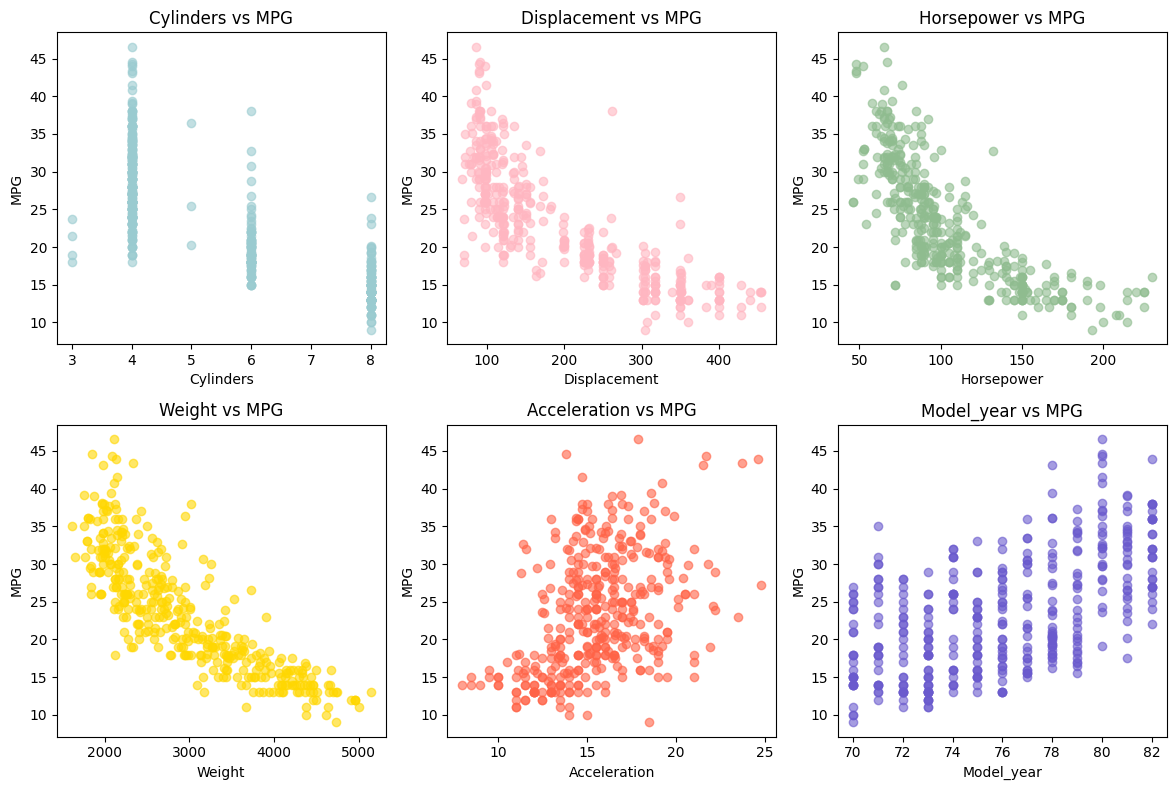

In [11]:
# visualizing scatter plot for each independent feature
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
colors = ["#9ACBD0", "#FFB6C1", "#8FBC8F", "#FFD700", "#FF6347", "#6A5ACD"]

for i, col in enumerate(columns):
    row, col_index = divmod(i, 3)
    axes[row, col_index].scatter(df[col], df['mpg'], c=colors[i], alpha=0.6)
    axes[row, col_index].set_xlabel(col.capitalize())
    axes[row, col_index].set_ylabel('MPG')
    axes[row, col_index].set_title(f'{col.capitalize()} vs MPG')

plt.tight_layout()
plt.show()

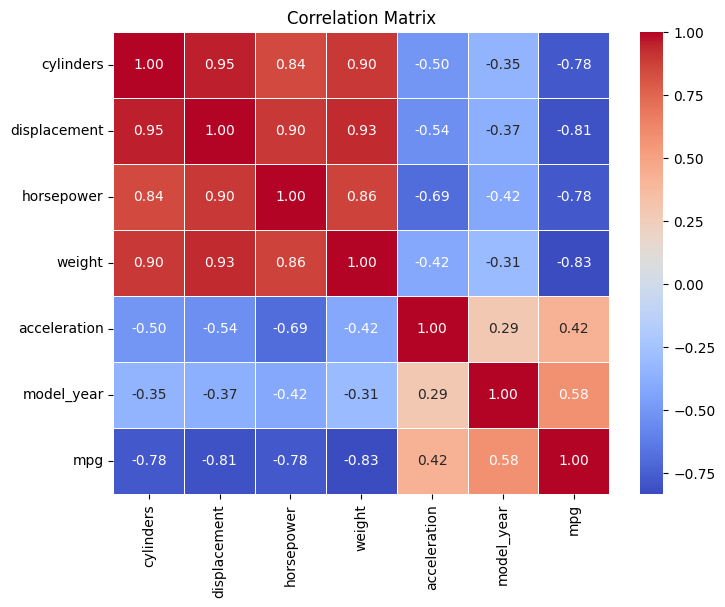

In [12]:
# correlation matrix for the relevant columns
correlation_matrix = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'mpg']].corr()
# display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# based on the correlation matrix, 
# we choose to exclude cylinders, acceleration and horsepower features
df = df.drop(columns=['cylinders', 'acceleration', 'horsepower'], axis=1)

### Preparing Data for Model Training

In [14]:
# split the data into dependent and independent variables
y = df['mpg']
x = df.drop(columns=['mpg'], axis=1)

In [15]:
# splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=66)

### Model Training and Evaluation

In [16]:
# initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# predict the target values for the test set
y_pred = model.predict(x_test)

In [18]:
# evaluate the model's performance using MSE and R-squared score
r2 = r2_score(y_test, y_pred)

print(f"R2 = {r2:.1f}")

R2 = 0.8
